Passo 1 - Vamos importar o TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


Passo 2 - vamos carregar o banco de dados Fashion Mnist. O tensorflow disponibiliza este banco de imagens de forma nativa.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Passo 3 - vamos utilizar a função "load_data()" do objeto mnist para carregar os dados. A função load_data já separa dados para treinamento e teste.

In [ ]:
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Vamos ver a quantidade de imagens que foram carregadas para treinamento, bem como a quantidade de imagens carregadas para teste.

In [ ]:
print("Quantidade de imagens separadas para treinamento:", len(training_images))
print("Quantidade de imagens separadas para teste:", len(test_images))

Quantidade de imagens separadas para treinamento: 60000
Quantidade de imagens separadas para teste: 10000


Passo 4 - vamos analisar algumas imagens com os respectivos labesl para entendermos no que a máquina se baseia para deduzir qual imagem é o que.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0  82 122  37   0   5   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  38 100  28 121   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0  86  43   0 136  15   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 104  30   0 102  40   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 111   2   0  73  81   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  17  87   0   0  45  81   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  54  90   0   0  24  92   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0  76  30   0   0   0  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  74   0   0   0   0  86   0   0   

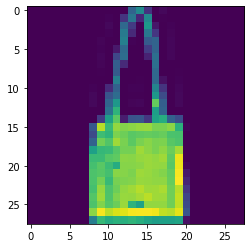

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
print(training_images[200])

import matplotlib.pyplot as plt
plt.imshow(training_images[200])

print("Label correspondente:", training_labels[130])

Passo 5 - Após analisarmos algumas imagens, vimos que o valor de cada pixel está entre 0 e 255. No entanto, para treinar uma rede neural é conveniente que façamos a normalização dos valores de cada pixel para ficarem entre 0 e 1.

In [ ]:
training_images = training_images/255.0
test_images = test_images/255.0
#print(training_images[130])

Passo 6 - Temos dois conjuntos de imagens: um que será utilizado para treinar o modelo e outro que será utilizado para testar o modelo que foi treinado. Está separação ocorre para evitar o overfitting. Dessa forma, vamos utilizar o conjunto de imagens que estão na variável training_images para treinar a rede neural. Depois, validaremos a acurácia da rede treinado utilizando o conjunto de imagens armazenado na variável test_images.

Vamos criar o modelo primeiro e depois vou comentar alguns novos conceitos.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ]
)

Comentários relacionados ao model que foi criado.

**1. Sequential:** define uma sequência de camadas para a rede neural. É como se criasse um cerébro vazio que receberá N camadas.

**2. Flatten:**  lembre-se que as imagens do fashion mnsit possuem resolução 28 x 28. O flatten transforma a matriz que possui 28 linhas e 28 colunas em um array unidimensional de 784 posições. O Flatten "achata" a matriz.

**3. Dense:** função utilizada para criar uma camada com neurônios. Pode abranger diferentes funções de ativação. **Relu:** se x>0, retorna 1, se não retorna 0. **Softmax:** retorna a probabilidade, os valores variam entre 0 e 1 e correspondem à probabilidade daquele neurônio ser o resultado final. No nosso caso, temos 10 neurônios na última camada porque o dataset possui 10 tipos de roupas distintos.

Passo 7: agora que as imagens estão normalizadas e que a arquitetura da rede neural está definida, é hora de partirmos para o treinamento da rede neural. iremos definir a quantidade de épocas na qual a rede será treinada e é importante observar que a cada época é possível medir a acurácia do modelo. A acurácia é uma métrica que mede o volume de acertos da rede neural.

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3760 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

Passo 8 - Uma vez que a rede foi treinada, vamos verificar a acurácia da rede para advinhar as imagens separadas para teste.

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3359 - accuracy: 0.8827


[0.33587655425071716, 0.8827000260353088]

Agora que o modelo foi treinado, vamos brincar um pouco com a rede neural.
O primeiro teste será para vermos a probabilidade elencada para cada saída.

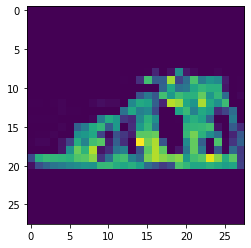

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[11])

In [ ]:
classificacao = model.predict(test_images)
#classificacao[10]
for i in range(10):
  print("%.2f"%classificacao[10,i])

0.00
0.00
0.08
0.00
0.91
0.00
0.01
0.00
0.00
0.00


Para matar a aula, vamos fazer a ideia do Davi. Vamos treinar a rede até que ela atinja uma acurácia desejada. Neste caso, utilizamos a função callback. A sacada do callback é utilizar como base uma acurácia desejada em detrimento do número de épocas.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\n Foi atingida a acurácia de 92%, logo, o treinamento será cancelado!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = myCallback()
model.fit(training_images, training_labels, epochs=10000, callbacks=[callback])

Epoch 1/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8243
Epoch 2/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8654
Epoch 3/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8767
Epoch 4/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8856
Epoch 5/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8901
Epoch 6/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2842 - accuracy: 0.8946
Epoch 7/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.8990
Epoch 8/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9033
Epoch 9/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9071
Epoch 10/10000
1875/1875 [=============================

Vamos fazer um rede neural convolucional e com pooling para reconhecer as imagens do fashio mnsit

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images,trainin_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
training_images.reshape(60000, 28, 28, 1)

test_images = test_images/255.0
test_images.reshape(10000, 28, 28, 1)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3731 - accuracy: 0.8660
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2503 - accuracy: 0.9089
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2076 - accuracy: 0.9232
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1733 - accuracy: 0.9361
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1458 - accuracy: 0.9454


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2513 - accuracy: 0.9143


[0.2513201832771301, 0.9143000245094299]